# import

In [100]:
# import
import pandas as pd
import numpy as np
import re
import ast

from sklearn.preprocessing import StandardScaler, LabelEncoder


import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager,rc

import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline
# 마이너스 부호 떄문에 한글이 깨질 수가 있어 설정
plt.rcParams['axes.unicode_minus'] = False

import matplotlib.font_manager as fm

# 한글 폰트 설정 (Windows 기준, 나눔 폰트 사용 예)
plt.rcParams['font.family'] = 'Malgun Gothic'


In [101]:
# 데이터 불러오기 1
df = pd.read_excel('../data/file/imdb_pca.xlsx', index_col=0)

# 딕셔너리 해제
for i in range(1, 12):
    df['season_{}'.format(i)] = df.loc[df['season_{}'.format(i)].notnull(), 'season_{}'.format(i)].apply(ast.literal_eval)

df.tail()

,korean_title,english_title,year,total_season_num,runtime,genre,age_rating,production_country,season_1,season_2,...,season_9,season_10,season_11,season_12,season_13,season_14,season_15,season_16,season_17,PCA
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
900,레일라,Leila,2019,1,46,"드라마, 전쟁, SF",15,인도,"{'S1.E1': [5.6, 322, 'Fri, Jun 14, 2019'], 'S1...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.799565
901,100만 엔의 여인들,Million Yen Women,2017,1,30,"스릴러, 범죄, 드라마, 로맨스",19,일본,"{'S1.E1': [7.6, 148, 'Fri, Apr 14, 2017'], 'S1...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.368528
902,킬러 코미디언,Hasmukh,2020,1,33,"범죄, 드라마, 스릴러, 코미디",19,인도,"{'S1.E1': [5.8, 60, 'Fri, Apr 17, 2020'], 'S1....",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.045870
903,달러,Dollar,2019,1,41,"액션, 드라마, 로맨스",15,레바논,"{'S1.E1': [8.0, 44, 'Thu, Aug 8, 2019'], 'S1.E...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.178660
904,"엘리트들, 못다 한 이야기: 나디아 구스만",Elite Short Stories: Nadia Guzmán,2021,1,11,"드라마, 로맨스",15,스페인,"{'S1.E1': [6.5, 225, 'Tue, Jun 15, 2021'], 'S1...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.633638


In [102]:
del df['season_12']
del df['season_13']
del df['season_14']
del df['season_15']
del df['season_16']
del df['season_17']

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 905 entries, 0 to 904
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   korean_title        905 non-null    object 
 1   english_title       905 non-null    object 
 2   year                905 non-null    int64  
 3   total_season_num    905 non-null    int64  
 4   runtime             905 non-null    int64  
 5   genre               905 non-null    object 
 6   age_rating          905 non-null    int64  
 7   production_country  905 non-null    object 
 8   season_1            905 non-null    object 
 9   season_2            266 non-null    object 
 10  season_3            136 non-null    object 
 11  season_4            79 non-null     object 
 12  season_5            49 non-null     object 
 13  season_6            35 non-null     object 
 14  season_7            21 non-null     object 
 15  season_8            8 non-null      object 
 16  season_9     

In [104]:
# 데이터 불러오기 2
watcha = pd.read_excel('../data/file/watcha.xlsx', index_col=0)

# 리스트 해제
for i in range(1, 12):
    watcha['season_{}'.format(i)] = watcha.loc[watcha['season_{}'.format(i)].notnull(), 'season_{}'.format(i)].apply(ast.literal_eval)

watcha.tail()

,korean_title,english_title,year,total_season_num,production_country,watcha_name,season_1,season_2,season_3,season_4,...,season_8,season_9,season_10,season_11,season_12,season_13,season_14,season_15,season_16,season_17
900,레일라,Leila,2019,1,인도,['레일라'],"[3.2, 27, 3]",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
901,100만 엔의 여인들,Million Yen Women,2017,1,일본,['100만 엔의 여자들'],"[3.0, 718, 100]",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
902,킬러 코미디언,Hasmukh,2020,1,인도,['킬러 코미디언'],"[1.6, 4, 0]",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
903,달러,Dollar,2019,1,레바논,['달러'],"[0.7, 3, 1]",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,"엘리트들, 못다 한 이야기: 나디아 구스만",Elite Short Stories: Nadia Guzmán,2021,1,스페인,"['엘리트들, 못다 한 이야기: 나디아 구스만']","[2.8, 420, 30]",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
del watcha['season_12']
del watcha['season_13']
del watcha['season_14']
del watcha['season_15']
del watcha['season_16']
del watcha['season_17']

In [106]:
# 연령 제한 숫자로 변환
df['age_rating'] = df['age_rating'].replace('ALL', 0).astype(int)

# 시즌11까지 ML을 위한 데이터 정리

## 00. IMDb,watcha 시즌 정보 정리

In [107]:
# 데이터 준비

imdb_12 = df[df['season_2'].notna()]
imdb_23 = df[df['season_3'].notna()]
imdb_34 = df[df['season_4'].notna()]
imdb_45 = df[df['season_5'].notna()]
imdb_56 = df[df['season_6'].notna()]
imdb_67 = df[df['season_7'].notna()]
imdb_78 = df[df['season_8'].notna()]
imdb_89 = df[df['season_9'].notna()]
imdb_910 = df[df['season_10'].notna()]
imdb_1011 = df[df['season_11'].notna()]

In [108]:
watcha_12 = watcha[watcha['season_2'].notna()]
watcha_23 = watcha[watcha['season_3'].notna()]
watcha_34 = watcha[watcha['season_4'].notna()]
watcha_45 = watcha[watcha['season_5'].notna()]
watcha_56 = watcha[watcha['season_6'].notna()]
watcha_67 = watcha[watcha['season_7'].notna()]
watcha_78 = watcha[watcha['season_8'].notna()]
watcha_89 = watcha[watcha['season_9'].notna()]
watcha_910 = watcha[watcha['season_10'].notna()]
watcha_1011 = watcha[watcha['season_11'].notna()]

In [109]:
len(imdb_12), len(imdb_23), len(imdb_34), len(imdb_45), len(imdb_56), len(imdb_67), len(imdb_78), len(imdb_89), len(imdb_910), len(imdb_1011)

(266, 136, 79, 49, 35, 21, 8, 4, 2, 1)

In [110]:
# IMDb 필요 컬럼 정리
# 현재 시즌의 데이터로 다음 시즌의 점수를 예측하기 위해 컬럼을 설정

imdb_12.loc[:, 'present_season'] = imdb_12['season_1']
imdb_12.loc[:, 'next_season'] = imdb_12['season_2']
imdb_23.loc[:, 'present_season'] = imdb_23['season_2']
imdb_23.loc[:, 'next_season'] = imdb_23['season_3']
imdb_34.loc[:, 'present_season'] = imdb_34['season_3']
imdb_34.loc[:, 'next_season'] = imdb_34['season_4']
imdb_45.loc[:, 'present_season'] = imdb_45['season_4']
imdb_45.loc[:, 'next_season'] = imdb_45['season_5']
imdb_56.loc[:, 'present_season'] = imdb_56['season_5']
imdb_56.loc[:, 'next_season'] = imdb_56['season_6']

imdb_67.loc[:, 'present_season'] = imdb_67['season_6']
imdb_67.loc[:, 'next_season'] = imdb_67['season_7']
imdb_78.loc[:, 'present_season'] = imdb_78['season_7']
imdb_78.loc[:, 'next_season'] = imdb_78['season_8']
imdb_89.loc[:, 'present_season'] = imdb_89['season_8']
imdb_89.loc[:, 'next_season'] = imdb_89['season_9']
imdb_910.loc[:, 'present_season'] = imdb_910['season_9']
imdb_910.loc[:, 'next_season'] = imdb_910['season_10']
imdb_1011.loc[:, 'present_season'] = imdb_1011['season_10']
imdb_1011.loc[:, 'next_season'] = imdb_1011['season_11']

C:\Users\rbfl7\AppData\Local\Temp\ipykernel_24552\1810267120.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_12.loc[:, 'present_season'] = imdb_12['season_1']
C:\Users\rbfl7\AppData\Local\Temp\ipykernel_24552\1810267120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_12.loc[:, 'next_season'] = imdb_12['season_2']
C:\Users\rbfl7\AppData\Local\Temp\ipykernel_24552\1810267120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [111]:
# watcha 필요 컬럼 IMDb에 추가

imdb_12.loc[:, 'w_present_season'] = watcha_12['season_1']
imdb_12.loc[:, 'w_next_season'] = watcha_12['season_2']
imdb_23.loc[:, 'w_present_season'] = watcha_23['season_2']
imdb_23.loc[:, 'w_next_season'] = watcha_23['season_3']
imdb_34.loc[:, 'w_present_season'] = watcha_34['season_3']
imdb_34.loc[:, 'w_next_season'] = watcha_34['season_4']
imdb_45.loc[:, 'w_present_season'] = watcha_45['season_4']
imdb_45.loc[:, 'w_next_season'] = watcha_45['season_5']
imdb_56.loc[:, 'w_present_season'] = watcha_56['season_5']
imdb_56.loc[:, 'w_next_season'] = watcha_56['season_6']

imdb_67.loc[:, 'w_present_season'] = watcha_67['season_6']
imdb_67.loc[:, 'w_next_season'] = watcha_67['season_7']
imdb_78.loc[:, 'w_present_season'] = watcha_78['season_7']
imdb_78.loc[:, 'w_next_season'] = watcha_78['season_8']
imdb_89.loc[:, 'w_present_season'] = watcha_89['season_8']
imdb_89.loc[:, 'w_next_season'] = watcha_89['season_9']
imdb_910.loc[:, 'w_present_season'] = watcha_910['season_9']
imdb_910.loc[:, 'w_next_season'] = watcha_910['season_10']
imdb_1011.loc[:, 'w_present_season'] = watcha_1011['season_10']
imdb_1011.loc[:, 'w_next_season'] = watcha_1011['season_11']

C:\Users\rbfl7\AppData\Local\Temp\ipykernel_24552\2581573071.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_12.loc[:, 'w_present_season'] = watcha_12['season_1']
C:\Users\rbfl7\AppData\Local\Temp\ipykernel_24552\2581573071.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_12.loc[:, 'w_next_season'] = watcha_12['season_2']
C:\Users\rbfl7\AppData\Local\Temp\ipykernel_24552\2581573071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [112]:
# 모든 데이터프레임 하나로 결합

imdb = pd.concat([imdb_12, imdb_23, imdb_34, imdb_45, imdb_56, imdb_67, imdb_78, imdb_89, imdb_910, imdb_1011], axis=0, ignore_index=True)

In [113]:
del imdb['season_1']
del imdb['season_2']
del imdb['season_3']
del imdb['season_4']
del imdb['season_5']
del imdb['season_6']
del imdb['season_7']
del imdb['season_8']
del imdb['season_9']
del imdb['season_10']
del imdb['season_11']

In [114]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   korean_title        601 non-null    object 
 1   english_title       601 non-null    object 
 2   year                601 non-null    int64  
 3   total_season_num    601 non-null    int64  
 4   runtime             601 non-null    int64  
 5   genre               601 non-null    object 
 6   age_rating          601 non-null    int32  
 7   production_country  601 non-null    object 
 8   PCA                 601 non-null    float64
 9   present_season      601 non-null    object 
 10  next_season         601 non-null    object 
 11  w_present_season    601 non-null    object 
 12  w_next_season       601 non-null    object 
dtypes: float64(1), int32(1), int64(3), object(8)
memory usage: 58.8+ KB


In [115]:
imdb['season_1'] = imdb['present_season'] 
imdb['season_2'] = imdb['next_season']

In [116]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   korean_title        601 non-null    object 
 1   english_title       601 non-null    object 
 2   year                601 non-null    int64  
 3   total_season_num    601 non-null    int64  
 4   runtime             601 non-null    int64  
 5   genre               601 non-null    object 
 6   age_rating          601 non-null    int32  
 7   production_country  601 non-null    object 
 8   PCA                 601 non-null    float64
 9   present_season      601 non-null    object 
 10  next_season         601 non-null    object 
 11  w_present_season    601 non-null    object 
 12  w_next_season       601 non-null    object 
 13  season_1            601 non-null    object 
 14  season_2            601 non-null    object 
dtypes: float64(1), int32(1), int64(3), object(10)
memory usag

In [117]:
# IMDb 평점
def get_imdb_rate(x):
    imdb_rate_lst = []

    # 딕셔너리에서 평점 부분만 가져옴
    for idx, val in x.items():
        imdb_rate_lst.append(val[0])

    # 시즌 평점 평균 구하기
    imdb_rate = np.mean(imdb_rate_lst)

    return imdb_rate

# IMDb 평점 매긴 사람 수
def get_imdb_rate_cnt(x):
    imdb_rate_cnt_lst = []

    # 딕셔너리에서 평점 매긴 사람만 가져옴
    for idx, val in x.items():
        imdb_rate_cnt_lst.append(val[1])


    # 평점을 매긴 사람의 시즌 평균 구하기
    imdb_rate_cnt = np.mean(imdb_rate_cnt_lst)

    return imdb_rate_cnt

In [118]:
# 시즌 1 평점 계산
imdb['i_s1_rate'] = imdb['season_1'].apply(get_imdb_rate)
imdb['i_s1_rate_cnt'] = imdb['season_1'].apply(get_imdb_rate_cnt)

# 시즌 2 평점 계산
imdb['i_s2_rate'] = imdb['season_2'].apply(get_imdb_rate)
imdb['i_s2_rate_cnt'] = imdb['season_2'].apply(get_imdb_rate_cnt)

In [119]:
# 왓챠 평점
def get_watcha_rate(x):
    watcha_tmp = x
    watcha_rate = watcha_tmp[0]
    return watcha_rate

In [120]:
# 왓챠 평점을 매긴 사람 수
def get_watcha_rate_cnt(x):
    watcha_tmp = x
    watcha_rate_cnt = watcha_tmp[1]
    return watcha_rate_cnt

In [121]:
imdb['w_season_1_rate'] = imdb['w_present_season'].apply(get_watcha_rate)
imdb['w_season_1_rate_cnt'] = imdb['w_present_season'].apply(get_watcha_rate_cnt)

## 01. 유지도

In [122]:
# 평점 유지도
def get_rate_retention(x):
    imdb_tmp = list(x.values())
    k = len(imdb_tmp)
    score = (imdb_tmp[k-1][0] / imdb_tmp[0][0])
    return score

# 평점 매긴 사람 수의 유지도(참여 유지도)
def get_rate_cnt_retention(x):
    imdb_tmp = list(x.values())
    k = len(imdb_tmp)
    score = (imdb_tmp[k-1][1] / imdb_tmp[0][1])
    return score

In [123]:
imdb['s1_rate_retention'] = imdb['season_1'].apply(get_rate_retention)
imdb['s1_rate_cnt_retention'] = imdb['season_1'].apply(get_rate_cnt_retention)

imdb['s2_rate_retention'] = imdb['season_2'].apply(get_rate_retention)
imdb['s2_rate_cnt_retention'] = imdb['season_2'].apply(get_rate_cnt_retention)

## 02. 장르 다양성

In [124]:
# 장르 다양성 지수
def get_genre_diversity(x):
    genre_len = len(x.split(', '))
    return genre_len

In [125]:
# 장르 다양성 지수
imdb['genre_len'] = imdb['genre'].apply(get_genre_diversity)

## 03. 시즌내 Term

In [126]:
from datetime import datetime
# 각 에피소드의 방영일자를 추출하여 처음과 마지막 방영일자를 계산하는 함수 정의
def get_first_last_air_dates(x):
    air_dates = []
    
    for episode in x.values():
        air_date_str = episode[2]
        
        # 여러 날짜 형식을 시도
        for fmt in ("%a, %b %d, %Y", "%b %Y"):
            try:
                air_date = datetime.strptime(air_date_str, fmt)
                air_dates.append(air_date)
                break
            except ValueError:
                continue
    
    if not air_dates:
        return None, None  # 변환 가능한 날짜가 없으면 None 반환
    
    first_air_date = min(air_dates)
    last_air_date = max(air_dates)
    
    return first_air_date, last_air_date

# apply 함수를 사용하여 각 행에 대해 처음과 마지막 방영일자를 계산
imdb['first_air_date'], imdb['last_air_date'] = zip(*imdb['season_1'].apply(get_first_last_air_dates))

print(imdb[['first_air_date', 'last_air_date']])

# gap_days 계산
imdb['s1_gap_days'] = (imdb['last_air_date'] - imdb['first_air_date']).dt.days

print(imdb[['first_air_date', 'last_air_date', 's1_gap_days']])

    first_air_date last_air_date
0       2021-06-04    2021-06-04
1       2020-12-18    2020-12-18
2       2017-10-02    2021-07-12
3       2010-11-07    2019-10-08
4       2010-10-10    2012-01-08
..             ...           ...
596     2018-07-18    2019-02-27
597     2020-11-13    2021-06-23
598     2018-10-07    2019-03-31
599     2021-10-21    2022-05-27
600     2019-10-06    2021-04-04

[601 rows x 2 columns]
    first_air_date last_air_date  s1_gap_days
0       2021-06-04    2021-06-04            0
1       2020-12-18    2020-12-18            0
2       2017-10-02    2021-07-12         1379
3       2010-11-07    2019-10-08         3257
4       2010-10-10    2012-01-08          455
..             ...           ...          ...
596     2018-07-18    2019-02-27          224
597     2020-11-13    2021-06-23          222
598     2018-10-07    2019-03-31          175
599     2021-10-21    2022-05-27          218
600     2019-10-06    2021-04-04          546

[601 rows x 3 columns]


In [127]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   korean_title           601 non-null    object        
 1   english_title          601 non-null    object        
 2   year                   601 non-null    int64         
 3   total_season_num       601 non-null    int64         
 4   runtime                601 non-null    int64         
 5   genre                  601 non-null    object        
 6   age_rating             601 non-null    int32         
 7   production_country     601 non-null    object        
 8   PCA                    601 non-null    float64       
 9   present_season         601 non-null    object        
 10  next_season            601 non-null    object        
 11  w_present_season       601 non-null    object        
 12  w_next_season          601 non-null    object        
 13  seaso

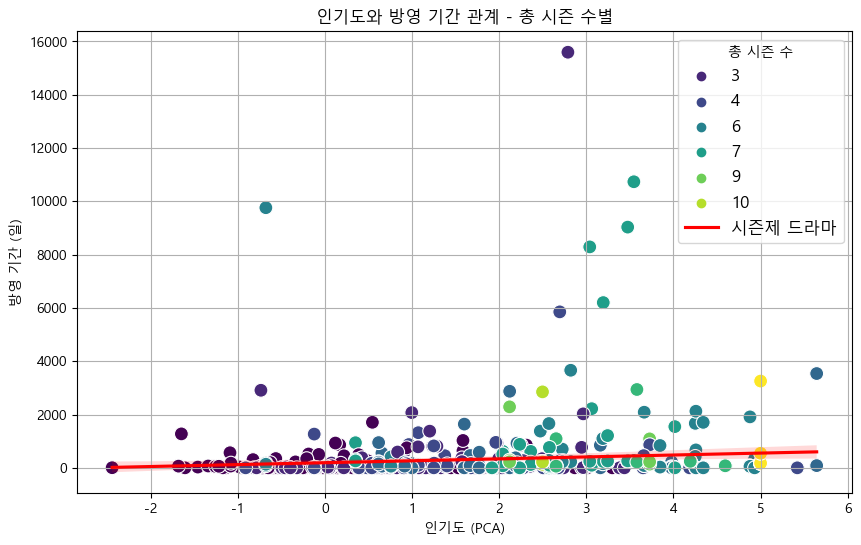

In [128]:
# 그래프 사이즈 설정
plt.figure(figsize=(10, 6))

# scatterplot with hue
sns.scatterplot(x='PCA', y='s1_gap_days', hue='total_season_num', data=imdb, palette='viridis', s=100)

# regplot for 1 season
sns.regplot(x='PCA', y='s1_gap_days', data=imdb[imdb['total_season_num'] == 1], scatter=False, color='blue', label='단일 드라마')

# regplot for 2+ seasons
sns.regplot(x='PCA', y='s1_gap_days', data=imdb[imdb['total_season_num'] >= 2], scatter=False, color='red', label='시즌제 드라마')

plt.title('인기도와 방영 기간 관계 - 총 시즌 수별')
plt.xlabel('인기도 (PCA)')
plt.ylabel('방영 기간 (일)')
plt.legend(title='총 시즌 수', fontsize='large')  # 범례 폰트 사이즈 조절
plt.grid(True)
plt.show()


## 04. 시즌간의 term

In [129]:
import pandas as pd
from datetime import datetime

# 시즌 간격 계산을 위한 컬럼 추가
imdb['season_gaps_days'] = None

for idx, row in imdb.iterrows():
    try:
        # 첫 번째 시즌의 마지막 에피소드 방영일자
        last_episode_s1 = list(row['season_1'].values())[-1][2]
        if last_episode_s1:
            last_air_date_s1 = datetime.strptime(last_episode_s1, "%a, %b %d, %Y")
        else:
            continue

        # 두 번째 시즌의 첫 번째 에피소드 방영일자
        first_episode_s2 = list(row['season_2'].values())[0][2]
        if first_episode_s2:
            next_air_date_s2 = datetime.strptime(first_episode_s2, "%a, %b %d, %Y")
        else:
            continue

        # 시즌 간의 간격 계산
        gap_days = (next_air_date_s2 - last_air_date_s1).days
        
        # imdb 데이터프레임에 간격 저장
        imdb.at[idx, 'season_gaps_days'] = gap_days

    except KeyError as e:
        print(f"KeyError: {e} in row {idx} for season 1 to season 2")
    except ValueError as e:
        print(f"ValueError: {e} in row {idx} for season 1 to season 2")

# 결과 확인
print(imdb[['korean_title', 'english_title', 'season_gaps_days']].head())

         korean_title           english_title season_gaps_days
0  스위트 투스: 사슴뿔을 가진 소년             Sweet Tooth              692
1                스위트홈              Sweet Home             1078
2                굿 닥터         The Good Doctor              182
3               워킹 데드        The Walking Dead              315
4    비르기트: 왕국, 권력, 영광  Borgen - Power & Glory              301


C:\Users\rbfl7\AppData\Local\Temp\ipykernel_24552\830282733.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='PCA', y='season_gaps_days', data=imdb, palette='viridis', s=100)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


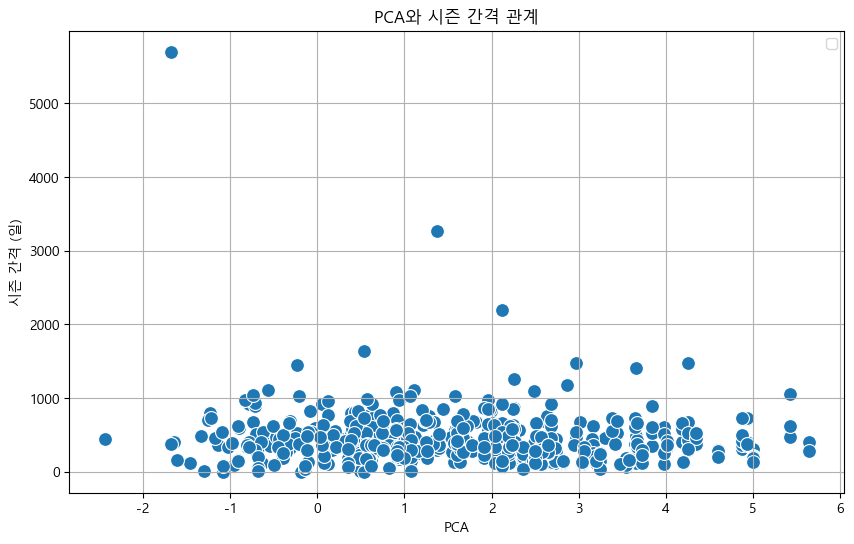

In [130]:
# 그래프 사이즈 설정
plt.figure(figsize=(10, 6))

# scatterplot 그리기
sns.scatterplot(x='PCA', y='season_gaps_days', data=imdb, palette='viridis', s=100)

# # 추세선 추가 (전체 데이터)
# sns.regplot(x='PCA', y='season_gaps_days', data=imdb, scatter_kws={'s': 0}, color='blue', label='추세선')

plt.title('PCA와 시즌 간격 관계')
plt.xlabel('PCA')
plt.ylabel('시즌 간격 (일)')
plt.legend()
plt.grid(True)
plt.show()

- term과 성공지표랑은 상관없어 보임
- 시즌의 term은 대부분 0~1000일 사이라는 것을 알 수 있음

---

## 05. encoding

In [131]:
# # 'genre' 컬럼을 문자열로 변환
# imdb['genre'] = imdb['genre'].astype(str)

# # '드라마' 항목 제거 및 공백 제거
# imdb['genre'] = imdb['genre'].apply(lambda x: ', '.join([genre.strip() for genre in x.split(', ') if genre.strip() != '드라마']))

# # unnest genre 열: 리스트를 풀어서 각 장르를 별도의 행으로 만듦
# imdb = imdb.explode('genre')

# # genre 컬럼을 콤마 기준으로 분리하여 개별 장르로 나눔
# genres = imdb['genre'].str.split(', ', expand=True)

# # 각 장르의 첫 두 글자를 새로운 장르 이름으로 설정하여 원핫인코딩
# genre_dummies = pd.get_dummies(genres.applymap(lambda x: x[:2] if pd.notnull(x) else x), prefix='genre')

# # 원핫인코딩 결과를 기존 데이터프레임과 합침
# imdb = pd.concat([imdb, genre_dummies], axis=1)

# # 원래 genre 컬럼 삭제
# imdb.drop(columns=['genre'], inplace=True)

# # 데이터프레임 확인
# print(imdb.columns)

In [132]:
# production_country 컬럼의 데이터를 처리하는 함수 정의
def process_countries(countries):
    # 쉼표를 기준으로 분리하고 첫 번째 나라 선택
    countries_list = countries.split(',')
    first_country = countries_list[0].strip()
    return first_country

# apply 함수를 사용하여 모든 행에 적용
imdb['production_country'] = imdb['production_country'].apply(process_countries)

In [133]:
# 빈도 인코딩 수행
country_counts = imdb['production_country'].value_counts()
imdb['production_country_freq_code'] = imdb['production_country'].map(country_counts)

# 인코딩된 코드 생성
imdb['production_country_code'], _ = pd.factorize(imdb['production_country'])

In [134]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   korean_title                  601 non-null    object        
 1   english_title                 601 non-null    object        
 2   year                          601 non-null    int64         
 3   total_season_num              601 non-null    int64         
 4   runtime                       601 non-null    int64         
 5   genre                         601 non-null    object        
 6   age_rating                    601 non-null    int32         
 7   production_country            601 non-null    object        
 8   PCA                           601 non-null    float64       
 9   present_season                601 non-null    object        
 10  next_season                   601 non-null    object        
 11  w_present_season              60

In [135]:
del imdb['first_air_date']
del imdb['last_air_date']
del imdb['present_season']
del imdb['next_season']
del imdb['season_1']
del imdb['season_2']

In [136]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   korean_title                  601 non-null    object 
 1   english_title                 601 non-null    object 
 2   year                          601 non-null    int64  
 3   total_season_num              601 non-null    int64  
 4   runtime                       601 non-null    int64  
 5   genre                         601 non-null    object 
 6   age_rating                    601 non-null    int32  
 7   production_country            601 non-null    object 
 8   PCA                           601 non-null    float64
 9   w_present_season              601 non-null    object 
 10  w_next_season                 601 non-null    object 
 11  i_s1_rate                     601 non-null    float64
 12  i_s1_rate_cnt                 601 non-null    float64
 13  i_s2_

In [137]:
# 저장

imdb.to_excel('../data/file/ml_all.xlsx')

- 장르인코딩, runtime, age 도 인코딩 해볼것

In [138]:
'''
# runtime을 카테고리로 변환하는 함수 정의
def categorize_runtime(runtime):
    if runtime <= 15:
        return '<=15'
    elif runtime <= 20:
        return '20'
    elif runtime <= 25:
        return '25'
    elif runtime <= 30:
        return '30'
    elif runtime <= 35:
        return '35'
    elif runtime <= 40:
        return '40'
    elif runtime <= 45:
        return '45'
    elif runtime <= 50:
        return '50'
    elif runtime <= 55:
        return '55'
    elif runtime <= 60:
        return '60'
    elif runtime <= 65:
        return '65'
    elif runtime < 71:
        return '70'
    else:
        return '>=71'

# apply 함수를 사용하여 카테고리화된 runtime 추가
imdb_final_6['runtime_category'] = imdb_final_6['runtime'].apply(categorize_runtime)

# 각 카테고리의 평균 runtime을 계산하여 매핑
category_mapping = imdb_final_6.groupby('runtime_category')['runtime'].mean().to_dict()

# 카테고리를 평균 값으로 매핑하여 target 인코딩 적용
imdb_final_6['runtime_encoded'] = imdb_final_6['runtime_category'].map(category_mapping)

print(imdb_final_6.head())
'''

"\n# runtime을 카테고리로 변환하는 함수 정의\ndef categorize_runtime(runtime):\n    if runtime <= 15:\n        return '<=15'\n    elif runtime <= 20:\n        return '20'\n    elif runtime <= 25:\n        return '25'\n    elif runtime <= 30:\n        return '30'\n    elif runtime <= 35:\n        return '35'\n    elif runtime <= 40:\n        return '40'\n    elif runtime <= 45:\n        return '45'\n    elif runtime <= 50:\n        return '50'\n    elif runtime <= 55:\n        return '55'\n    elif runtime <= 60:\n        return '60'\n    elif runtime <= 65:\n        return '65'\n    elif runtime < 71:\n        return '70'\n    else:\n        return '>=71'\n\n# apply 함수를 사용하여 카테고리화된 runtime 추가\nimdb_final_6['runtime_category'] = imdb_final_6['runtime'].apply(categorize_runtime)\n\n# 각 카테고리의 평균 runtime을 계산하여 매핑\ncategory_mapping = imdb_final_6.groupby('runtime_category')['runtime'].mean().to_dict()\n\n# 카테고리를 평균 값으로 매핑하여 target 인코딩 적용\nimdb_final_6['runtime_encoded'] = imdb_final_6['runtime_category']

In [139]:
# imdb_final_6['runtime'] = imdb_final_6['runtime_encoded']

- 다시 군집화해보기

---

---

## 단일, 시즌제 드라마 비교 term

In [140]:
# 엑셀 파일을 읽어옵니다.
df = pd.read_excel('../data/file/imdb_pca_1.xlsx', index_col=0)

In [141]:
# 딕셔너리 해제
for i in range(1, 12):
    df['season_{}'.format(i)] = df.loc[df['season_{}'.format(i)].notnull(), 'season_{}'.format(i)].apply(ast.literal_eval)

df.tail()

,korean_title,english_title,year,total_season_num,runtime,genre,age_rating,production_country,critic_review,season_1,...,s2_gap_days,s3_gap_days,s4_gap_days,s5_gap_days,s6_gap_days,s7_gap_days,s8_gap_days,s9_gap_days,s10_gap_days,s11_gap_days
900,레일라,Leila,2019,1,47.729412,"드라마, 전쟁, SF",15,인도,8,"{'S1.E1': [5.6, 322, 'Fri, Jun 14, 2019'], 'S1...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
901,100만 엔의 여인들,Million Yen Women,2017,1,28.222222,"스릴러, 범죄, 드라마, 로맨스",19,일본,0,"{'S1.E1': [7.6, 148, 'Fri, Apr 14, 2017'], 'S1...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
902,킬러 코미디언,Hasmukh,2020,1,32.842105,"범죄, 드라마, 스릴러, 코미디",19,인도,5,"{'S1.E1': [5.8, 60, 'Fri, Apr 17, 2020'], 'S1....",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
903,달러,Dollar,2019,1,43.488506,"액션, 드라마, 로맨스",15,레바논,0,"{'S1.E1': [8.0, 44, 'Thu, Aug 8, 2019'], 'S1.E...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,"엘리트들, 못다 한 이야기: 나디아 구스만",Elite Short Stories: Nadia Guzmán,2021,1,12.000000,"드라마, 로맨스",15,스페인,3,"{'S1.E1': [6.5, 225, 'Tue, Jun 15, 2021'], 'S1...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


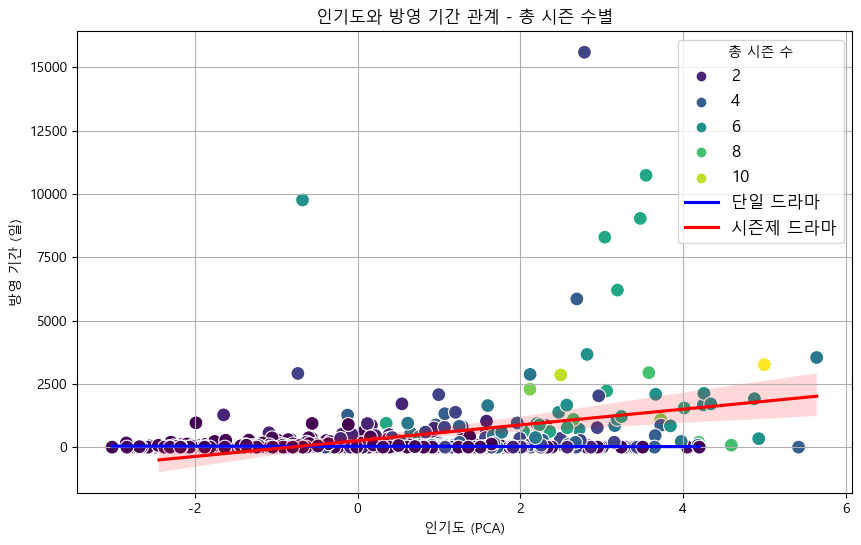

In [142]:
# 그래프 사이즈 설정
plt.figure(figsize=(10, 6))

# scatterplot with hue
sns.scatterplot(x='pca', y='s1_gap_days', hue='total_season_num', data=df, palette='viridis', s=100)

# regplot for 1 season
sns.regplot(x='pca', y='s1_gap_days', data=df[df['total_season_num'] == 1], scatter=False, color='blue', label='단일 드라마')

# regplot for 2+ seasons
sns.regplot(x='pca', y='s1_gap_days', data=df[df['total_season_num'] >= 2], scatter=False, color='red', label='시즌제 드라마')

plt.title('인기도와 방영 기간 관계 - 총 시즌 수별')
plt.xlabel('인기도 (PCA)')
plt.ylabel('방영 기간 (일)')
plt.legend(title='총 시즌 수', fontsize='large')  # 범례 폰트 사이즈 조절
plt.grid(True)
plt.show()

### 시즌간의 term (한 작품의 시즌간 term의 평균값으로 시각화 )

In [143]:
import pandas as pd
from datetime import datetime

# 시즌 컬럼 리스트 생성
season_columns = [f'season_{i}' for i in range(1, 12)]  # 시즌 1부터 시즌 11까지
season_gaps = []

for idx, row in df.iterrows():
    seasons = []

    # 시즌 데이터를 추출하여 리스트에 추가
    for season_col in season_columns:
        if season_col in row and pd.notnull(row[season_col]):
            season_data = row[season_col]
            seasons.append(season_data)

    # 시즌 간격을 계산
    if len(seasons) > 1:
        # 각 드라마에 대해 시즌 간격을 계산
        for i in range(len(seasons) - 1):
            try:
                # 현재 시즌의 마지막 에피소드 방영일자
                last_episode_current_season = list(seasons[i].values())[-1][2]
                if last_episode_current_season:
                    last_air_date = datetime.strptime(last_episode_current_season, "%a, %b %d, %Y")
                else:
                    continue
                
                # 다음 시즌의 첫 번째 에피소드 방영일자
                first_episode_next_season = list(seasons[i + 1].values())[0][2]
                if first_episode_next_season:
                    next_air_date = datetime.strptime(first_episode_next_season, "%a, %b %d, %Y")
                else:
                    continue
                
                # 시즌 간의 간격 계산
                gap_days = (next_air_date - last_air_date).days
                gap_years_months = f"{gap_days // 365}년 {gap_days % 365 // 30}개월"
                
                # 결과 저장
                season_gaps.append({
                    'korean_title': row['korean_title'],
                    'english_title': row['english_title'],
                    'year': row['year'],
                    'season': f"Season {i + 1} to Season {i + 2}",
                    'gap_days': gap_days,
                    'gap_years_months': gap_years_months
                })
            except KeyError as e:
                print(f"KeyError: {e} in row {idx} for season {i + 1} to season {i + 2}")
            except ValueError as e:
                print(f"ValueError: {e} in row {idx} for season {i + 1} to season {i + 2}")

# 결과 데이터 프레임 생성
season_gaps_df = pd.DataFrame(season_gaps)

# 중복된 행 제거
season_gaps_df = season_gaps_df.drop_duplicates()

In [144]:
# Calculate the mean of 'gap_days' grouped by 'korean_title'
grouped = season_gaps_df.groupby('korean_title')['gap_days'].mean().reset_index()

# Merge with original dataframe to get 'english_title' and 'year'
merged = grouped.merge(season_gaps_df[['korean_title', 'english_title', 'year']], on='korean_title', how='left')

# Drop duplicates to keep only unique rows
merged = merged.drop_duplicates(subset=['korean_title'])

# Rename columns for clarity
merged.rename(columns={'gap_days': 'average_gap_days'}, inplace=True)

# Print the new DataFrame
print(merged.head())

      korean_title  average_gap_days             english_title  year
0               3%        452.666667                        3%  2016
3            A 리스트        974.000000                The A List  2018
4             D.P.        700.000000                      D.P.  2021
5   DC 레전드 오브 투모로우        190.500000  DC's Legends of Tomorrow  2016
11          DC 타이탄        419.666667                    Titans  2018


In [145]:
# 'korean_title'을 기준으로 두 데이터프레임을 merge
merged_data = pd.merge(df, merged, on=['korean_title','english_title','year'])

In [146]:
merged_data[['korean_title','average_gap_days']]

,korean_title,average_gap_days
0,스위트 투스: 사슴뿔을 가진 소년,692.000000
1,스위트홈,1078.000000
2,굿 닥터,169.400000
3,워킹 데드,201.600000
4,"비르기트: 왕국, 권력, 영광",1321.333333
...,...,...
261,꽃들의 집,224.000000
262,우리가 몰랐던 그녀,819.000000
263,악플러는 꺼져주세요,371.000000
264,거짓말의 거짓말,728.000000


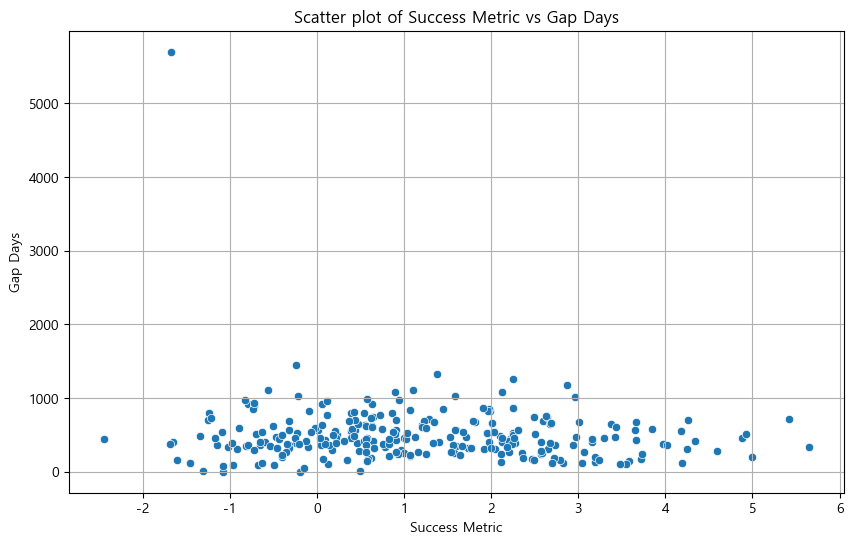

In [147]:
# Scatter plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca', y='average_gap_days', data=merged_data)
plt.title('Scatter plot of Success Metric vs Gap Days')
plt.xlabel('Success Metric')
plt.ylabel('Gap Days')
plt.grid(True)
plt.show()

In [148]:
merged_data = merged_data[merged_data['average_gap_days'] <= 5000]

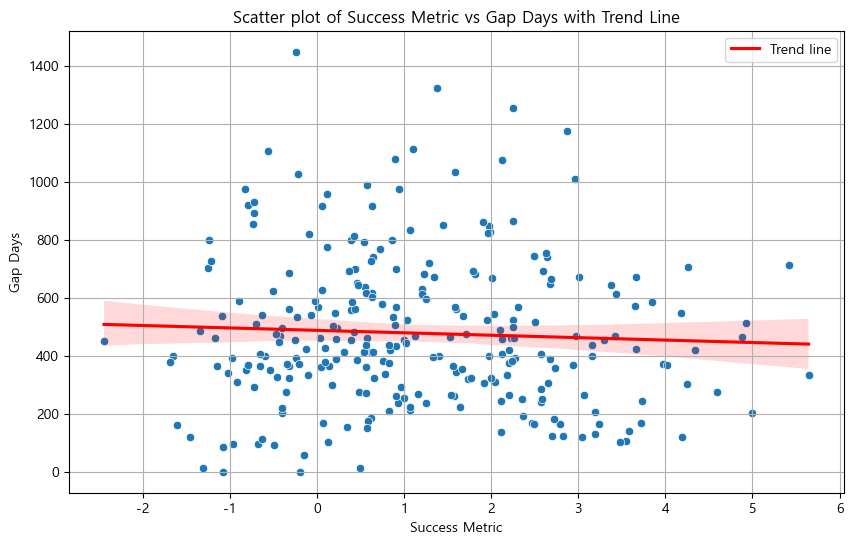

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca', y='average_gap_days', data=merged_data)
sns.regplot(x='pca', y='average_gap_days', data=merged_data, scatter=False, color='red', label='Trend line')
plt.title('Scatter plot of Success Metric vs Gap Days with Trend Line')
plt.xlabel('Success Metric')
plt.ylabel('Gap Days')
plt.legend()
plt.grid(True)
plt.show()